# Pandas library

## Pandas series and dataframes

### Series

The Pandas user guide defines a series as:

> A Serie is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [3]:
# Creating a series from a list

import pandas as pd
import numpy as np

s = pd.Series([1, 3, 5, np.nan, 6, 8]) # create a series from a list, np.nan represents missing values

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Creating a series from a numpy array

s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) # create a series from a numpy array and specify the index for each element

s

a   -0.500169
b   -0.154857
c    0.058440
d   -0.524529
e    0.701179
dtype: float64

In [5]:
# Creating a series from a dictionary

my_dict = {'a': 0., 'b': 1., 'c': 2.} # create a dictionary

s = pd.Series(my_dict) # create a series from a dictionary

s

a    0.0
b    1.0
c    2.0
dtype: float64

In [6]:
# Creating a series from a scalar

s = pd.Series(10., index=['a', 'b', 'c', 'd', 'e']) # create a series from a scalar and specify the index for each element

s

a    10.0
b    10.0
c    10.0
d    10.0
e    10.0
dtype: float64

### Dataframes

According to the Pandas user guide,

> A Dataframe is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input

In [7]:
# Creating a dataframe from lists of lists or tuples

my_data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] # create a list of lists

my_df = pd.DataFrame(my_data, columns=['a', 'b', 'c']) # create a dataframe from a list of lists and specify the column names

my_df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [8]:
# Creating a dataframe from a NumPy array

my_array = np.random.randn(3, 3) # create a numpy array

my_df = pd.DataFrame(my_array, columns=['a', 'b', 'c']) # create a dataframe from a numpy array and specify the column names

my_df

,a,b,c
0,-0.136002,-0.082484,-1.486411
1,-0.066729,-1.821140,0.369941
2,-0.002835,0.653143,0.040031


In [9]:
# Creating a dataframe from a dictionary

my_dict = {'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]} # create a dictionary

my_df = pd.DataFrame(my_dict) # create a dataframe from a dictionary

my_df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [11]:
# Creating a dataframe from a Pandas series

my_series = pd.Series([10, 20, 30, 40, 50]) # create a series

my_df = pd.DataFrame(my_series) # create a dataframe from a series

my_df

,0
0,10
1,20
2,30
3,40
4,50


In [12]:
# Using Dataframe.from_dict()

my_df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])])) # create a dataframe from a dictionary

my_df

,A,B
0,1,4
1,2,5
2,3,6


#### Column selection, addition, deletion

In [13]:
# Selection of a column

my_df['A'] # select a column

0    1
1    2
2    3
Name: A, dtype: int64

In [14]:
# Adding a new column

my_df['C'] = [7, 8, 9] # add a new column

my_df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [15]:
# Creating a column based on operations on other columns

my_df['D'] = my_df['A'] + my_df['B'] # create a new column based on operations on other columns

my_df

,A,B,C,D
0,1,4,7,5
1,2,5,8,7
2,3,6,9,9


In [16]:
my_df['E'] = my_df['B'] * my_df['C'] # create a new column based on operations on other columns

my_df

,A,B,C,D,E
0,1,4,7,5,28
1,2,5,8,7,40
2,3,6,9,9,54


In [17]:
# Using logical operations to create a new column

my_df['F'] = my_df['A'] > 1 # create a new column based on logical operations

my_df

,A,B,C,D,E,F
0,1,4,7,5,28,False
1,2,5,8,7,40,True
2,3,6,9,9,54,True


In [18]:
# deleting a column

del my_df['D'] # delete a column

my_df

,A,B,C,E,F
0,1,4,7,28,False
1,2,5,8,40,True
2,3,6,9,54,True


In [19]:
# poping a column

e = my_df.pop('E') # pop a column

my_df

,A,B,C,F
0,1,4,7,False
1,2,5,8,True
2,3,6,9,True


In [20]:
e

0    28
1    40
2    54
Name: E, dtype: int64

#### Loc and iLoc

##### loc

In [22]:
my_data = {"name": ["John", "Jane", "Mike"], "age": [25, 30, 35]}
my_df = pd.DataFrame(my_data)

my_df

,name,age
0,John,25
1,Jane,30
2,Mike,35


In [23]:
# Selecting the row with index 1
row = my_df.loc[1]
print(row)

name    Jane
age       30
Name: 1, dtype: object


You can also use it to select a specific column from the row:

In [24]:
col = my_df.loc[1, "name"]
print(col)

Jane


##### iloc

In [25]:
# Selecting the row with index 1
row = my_df.iloc[1]
print(row)

name    Jane
age       30
Name: 1, dtype: object


In [26]:
# Selecting the row with index 1 and column with index 0

col = my_df.iloc[1, 0]
print(col)

Jane


## Managing data files

In order to explore more of Pandas we are going to use a famous dataset called Iris. The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. It is a small, well-formed, and easy-to-use dataset that is widely used as a benchmark for classification and clustering algorithms.

In [72]:
# Load the Iris dataset from the web

iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                      header=None, 
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# print the head of the dataset

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
# print the tail (last elements) of the dataset

iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
# Get information about the dataset

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
# Get the number of rows and columns
iris_df.shape

(150, 5)

In [76]:
# Get an statistical summary of the dataset

iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
# Selecting all rows where species is setosa

setosa_df = iris_df[iris_df["species"] == "Iris-setosa"]

print(setosa_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [79]:
# Using query() to select all rows where species is virginica

iris_df.query("species == 'Iris-virginica'").head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [80]:
# Get the unique values of the species column and the number of occurrences of each value

iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [81]:
# The same but as a percentage

iris_df['species'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: species, dtype: float64

Use aggregation functions like mean(), sum(), count(), max() and min() to calculate summary statistics for each group.

In [82]:
# Grouping by class and calculating mean of each column

iris_df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [83]:
# Making a pivot table from the dataset

iris_df.pivot_table(index="species", columns="sepal_length", values="sepal_width")  # pivot table with mean values


sepal_length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
species,,,,,,,,,,,,,,,,,,,,,
Iris-setosa,3.0,3.033333,2.3,3.325,3.2,3.18,3.075,3.3625,3.6,3.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iris-versicolor,NaN,NaN,NaN,NaN,NaN,NaN,2.400,2.1500,2.5,2.700000,...,2.8,3.100000,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iris-virginica,NaN,NaN,NaN,NaN,NaN,NaN,2.500,NaN,NaN,NaN,...,3.1,3.133333,NaN,3.0,3.266667,2.9,2.8,3.0,3.05,3.8


In [90]:
# Get a correlation matrix of the dataset

iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Pandas visualization

In [91]:
# Make a heatmap of the correlation matrix

iris_df.corr().style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:title={'center':'Sepal length vs sepal width'}, xlabel='sepal_length', ylabel='sepal_width'>

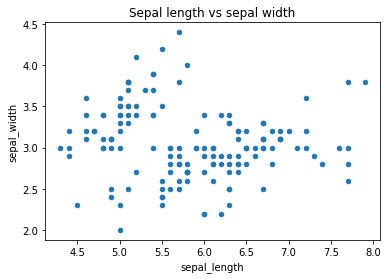

In [84]:
# make a scatter plot of sepal length vs sepal width 

iris_df.plot(kind="scatter", x="sepal_length", y="sepal_width", title="Sepal length vs sepal width")

<AxesSubplot:>

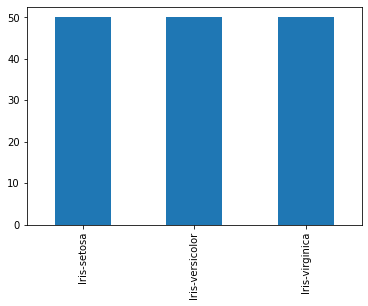

In [63]:
# make a histogram of class counts

iris_df['class'].value_counts().plot(kind='bar')

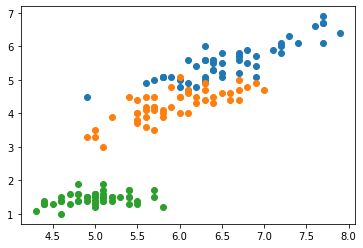

In [92]:
# using matplotlib to make a scatter plot of sepal length vs petal length and color the points by species

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(iris_df.query("species == 'Iris-virginica'")['sepal_length'], iris_df.query("species == 'Iris-virginica'")['petal_length'], label='setosa')
ax.scatter(iris_df.query("species == 'Iris-versicolor'")['sepal_length'], iris_df.query("species == 'Iris-versicolor'")['petal_length'], label='versicolor')
ax.scatter(iris_df.query("species == 'Iris-setosa'")['sepal_length'], iris_df.query("species == 'Iris-setosa'")['petal_length'], label='virginica')

<AxesSubplot:>

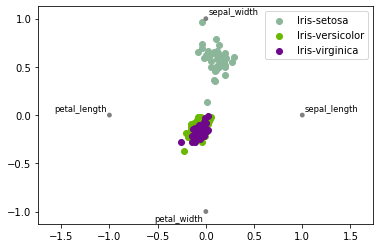

In [100]:
# radviz plot of the dataset using pandas

from pandas.plotting import radviz

radviz(iris_df, "species")

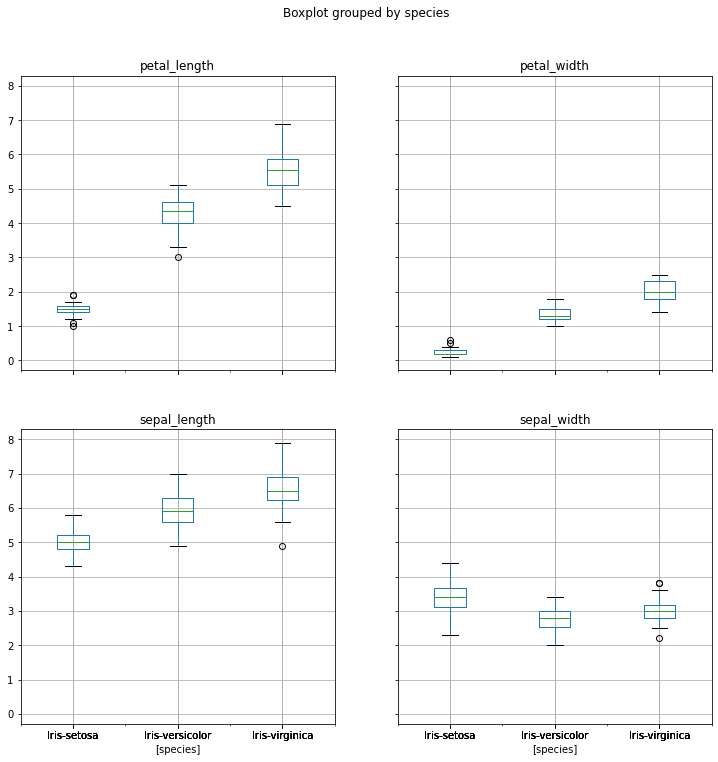

In [103]:
iris_df.boxplot(by="species", figsize=(12, 12));